In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt 

### Setup
* **path** - variable, which refers to path with robot's csv files
* **start** - index of first robot's csv file
* **end** - index of last robot's csv file (open interval, it should be (last + 1) )
* **experiments** - number of experiments

In [6]:
path = '../data/re3simro21..30/'
start = 21 
end = 31
experiments = 3

### Load data from csv file

In [3]:
data = []
names = []
for i in range(start, end):
    for ex in range(1,  experiments + 1):
        filename = 'robot_{}-{}.csv'.format(i,ex) # creating filename
        
        temp = np.genfromtxt(path + filename, delimiter=',') #loading data from file
        temp = temp[~np.isnan(temp)] # deleting last nan value, because the file contains comma after last value
        # so it reads it as nan value, but there is actually no value
        data.append(temp)
        names.append(filename.split(".")[0].split("_")[1]) # we want to omit .csv ending and robot prefix
        
data = pd.DataFrame(dict(zip(names, data)), columns=names)

1001


### Plotting the robots from table

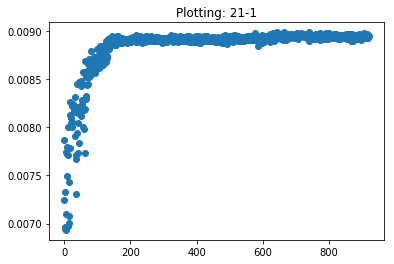


    Number of points plotted:                 920
    Mean:                                     0.008421384149999997
    std:                                      0.0015596554240094903
    Maximmum value:                           0.00898408
    MAximmum value in generation:             744
    


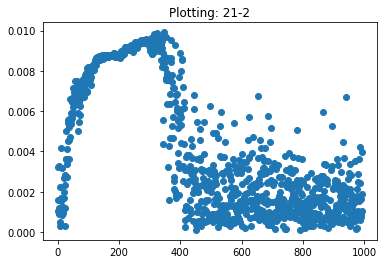


    Number of points plotted:                 995
    Mean:                                     0.04015589061999997
    std:                                      0.518492204475699
    Maximmum value:                           8.7623
    MAximmum value in generation:             21
    


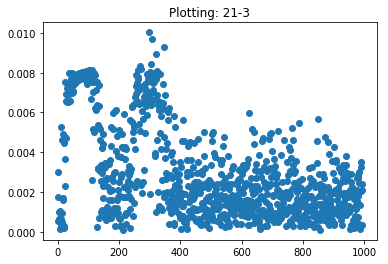


    Number of points plotted:                 994
    Mean:                                     0.04237273759099996
    std:                                      0.5430471181845312
    Maximmum value:                           9.75476
    MAximmum value in generation:             543
    


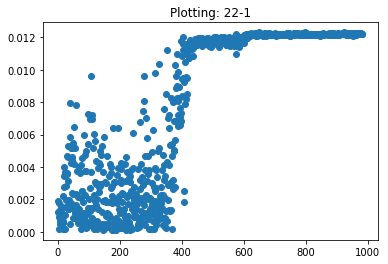


    Number of points plotted:                 983
    Mean:                                     0.11447217074299999
    std:                                      0.867342644294285
    Maximmum value:                           9.83256
    MAximmum value in generation:             19
    


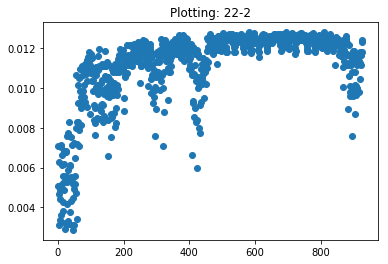


    Number of points plotted:                 927
    Mean:                                     0.024778555764000055
    std:                                      0.243780235835706
    Maximmum value:                           5.85511
    MAximmum value in generation:             94
    


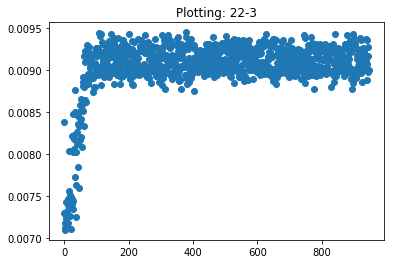


    Number of points plotted:                 947
    Mean:                                     0.02237729078799998
    std:                                      0.30578430423695935
    Maximmum value:                           8.92535
    MAximmum value in generation:             4
    


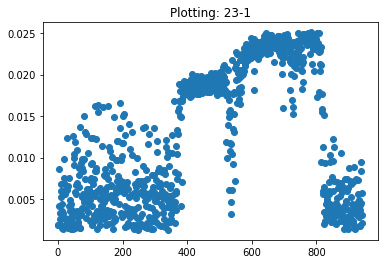


    Number of points plotted:                 943
    Mean:                                     0.03214457560699997
    std:                                      0.3433714436107512
    Maximmum value:                           8.80944
    MAximmum value in generation:             63
    


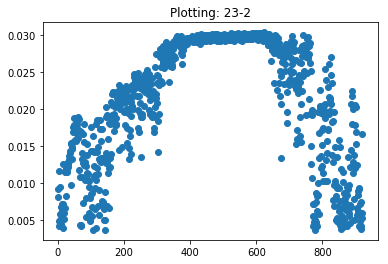


    Number of points plotted:                 922
    Mean:                                     0.021221735177
    std:                                      0.03989154260241861
    Maximmum value:                           1.24466
    MAximmum value in generation:             3
    


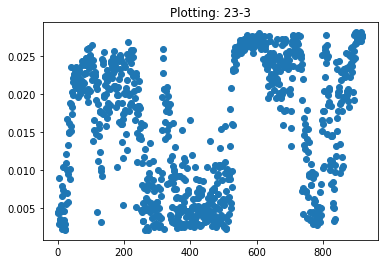


    Number of points plotted:                 920
    Mean:                                     0.01517295931799999
    std:                                      0.00924264944985359
    Maximmum value:                           0.0285343
    MAximmum value in generation:             993
    


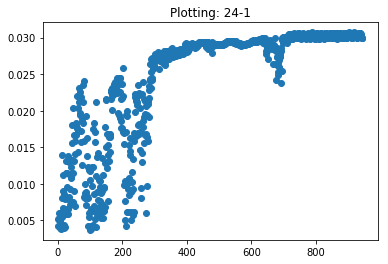


    Number of points plotted:                 945
    Mean:                                     0.031357035204
    std:                                      0.2515875691870578
    Maximmum value:                           7.97401
    MAximmum value in generation:             5
    


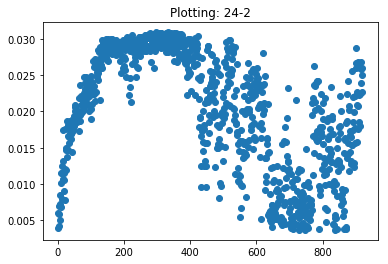


    Number of points plotted:                 921
    Mean:                                     0.018802524904000025
    std:                                      0.00933502772474298
    Maximmum value:                           0.0308951
    MAximmum value in generation:             348
    


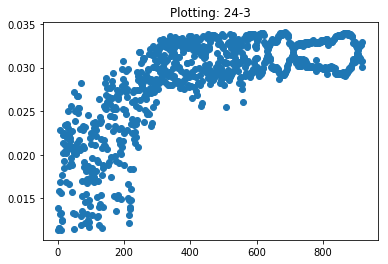


    Number of points plotted:                 920
    Mean:                                     0.033700892727
    std:                                      0.22590774741405822
    Maximmum value:                           7.16573
    MAximmum value in generation:             85
    


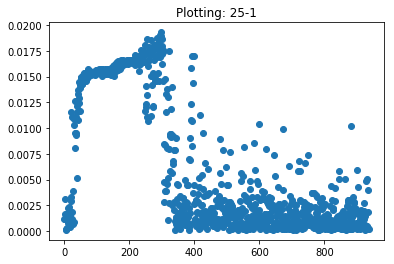


    Number of points plotted:                 937
    Mean:                                     0.2843067114429999
    std:                                      1.2434432298028504
    Maximmum value:                           9.99206
    MAximmum value in generation:             924
    


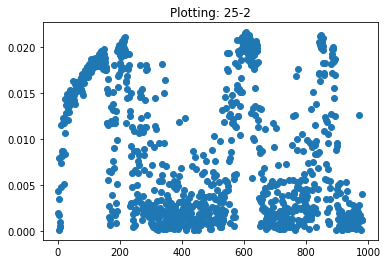


    Number of points plotted:                 982
    Mean:                                     0.09838311673399995
    std:                                      0.7960909651665998
    Maximmum value:                           9.94642
    MAximmum value in generation:             928
    


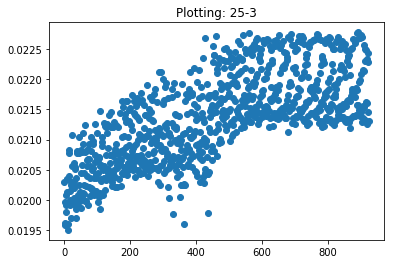


    Number of points plotted:                 926
    Mean:                                     0.025599630959999994
    std:                                      0.12228022246975637
    Maximmum value:                           3.57773
    MAximmum value in generation:             3
    


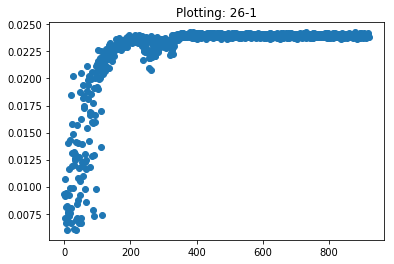


    Number of points plotted:                 921
    Mean:                                     0.02098570895899999
    std:                                      0.006362943803137433
    Maximmum value:                           0.0242728
    MAximmum value in generation:             460
    


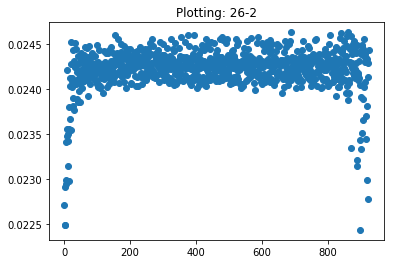


    Number of points plotted:                 925
    Mean:                                     0.023511579606000015
    std:                                      0.003614853965975687
    Maximmum value:                           0.0260829
    MAximmum value in generation:             998
    


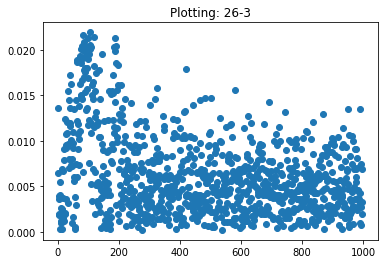


    Number of points plotted:                 998
    Mean:                                     0.018080741678999982
    std:                                      0.2654626495499192
    Maximmum value:                           6.34209
    MAximmum value in generation:             372
    


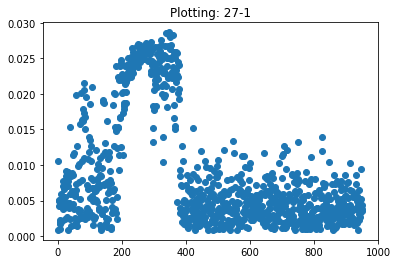


    Number of points plotted:                 952
    Mean:                                     0.021976060839999992
    std:                                      0.3015618543053737
    Maximmum value:                           7.22466
    MAximmum value in generation:             28
    


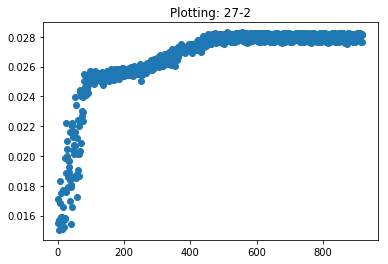


    Number of points plotted:                 920
    Mean:                                     0.025063756704999995
    std:                                      0.005612463110743628
    Maximmum value:                           0.0283034
    MAximmum value in generation:             635
    


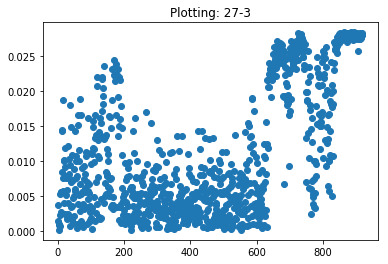


    Number of points plotted:                 920
    Mean:                                     0.012807001211999987
    std:                                      0.010119771131045207
    Maximmum value:                           0.0297088
    MAximmum value in generation:             989
    


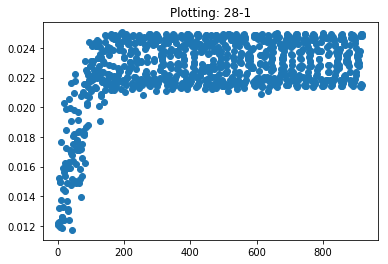


    Number of points plotted:                 920
    Mean:                                     0.021178100291999995
    std:                                      0.005098656918290005
    Maximmum value:                           0.0250629
    MAximmum value in generation:             272
    


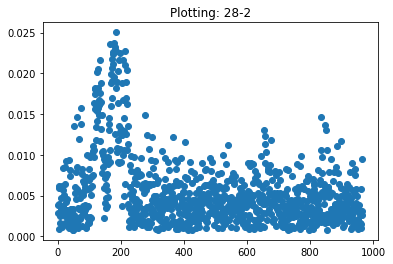


    Number of points plotted:                 966
    Mean:                                     0.013241188604999985
    std:                                      0.1781150391797252
    Maximmum value:                           4.46309
    MAximmum value in generation:             19
    


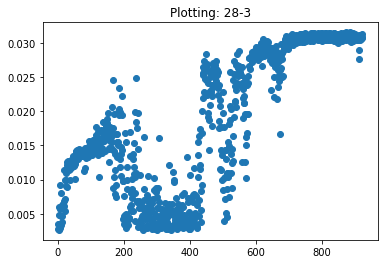


    Number of points plotted:                 923
    Mean:                                     0.017537996304
    std:                                      0.010901386201748223
    Maximmum value:                           0.031543
    MAximmum value in generation:             949
    


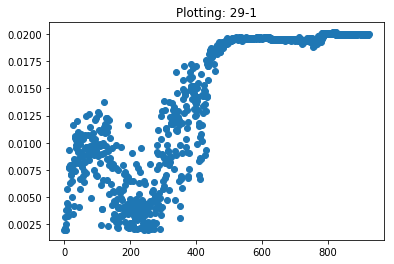


    Number of points plotted:                 924
    Mean:                                     0.013195051306
    std:                                      0.006977190080420998
    Maximmum value:                           0.0201732
    MAximmum value in generation:             896
    


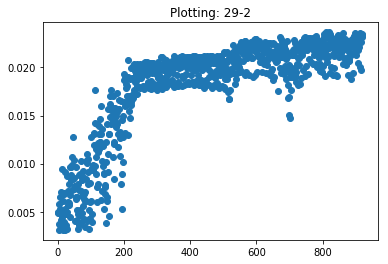


    Number of points plotted:                 921
    Mean:                                     0.016814380858999993
    std:                                      0.006770317465857903
    Maximmum value:                           0.0236662
    MAximmum value in generation:             897
    


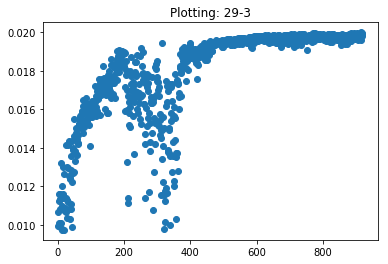


    Number of points plotted:                 920
    Mean:                                     0.01701189139400001
    std:                                      0.004090126934709787
    Maximmum value:                           0.0200002
    MAximmum value in generation:             994
    


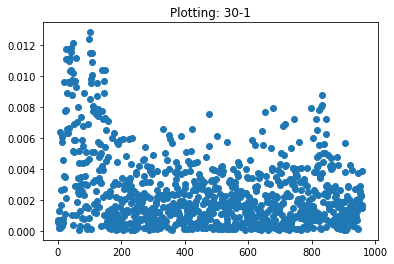


    Number of points plotted:                 961
    Mean:                                     0.23875503448199992
    std:                                      1.290230599789256
    Maximmum value:                           9.90126
    MAximmum value in generation:             996
    


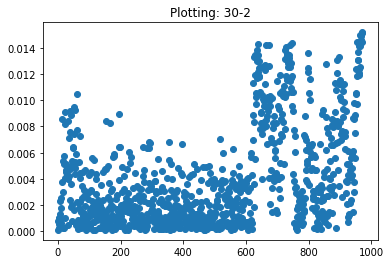


    Number of points plotted:                 972
    Mean:                                     0.1750198349019997
    std:                                      1.0963982607544749
    Maximmum value:                           9.81574
    MAximmum value in generation:             177
    


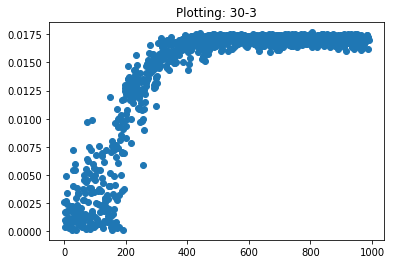


    Number of points plotted:                 990
    Mean:                                     0.05903825608399998
    std:                                      0.5103182063806653
    Maximmum value:                           8.37842
    MAximmum value in generation:             91
    


In [22]:
def reject_outliers(data, keep = 0.92):
    m = 0
    o_size = data.size
    a_size = 0
    while a_size < o_size*keep:
        a_data = data[abs(data - np.mean(data)) < m * np.std(data)]
        a_size = a_data.size
        m+=0.01
    return a_data 


for robot in data.columns:
    y = reject_outliers(data[robot])
    x = np.arange(0, y.size)
    plt.title("Plotting: {}".format(robot))
    plt.plot(x, y, 'o')
    plt.show()
    print("""
    Number of points plotted:                 {}
    Mean:                                     {}
    std:                                      {}
    Maximmum value:                           {}
    MAximmum value in generation:             {}
    """.format(y.size, 
               data[robot].mean(), 
               data[robot].std(), 
               data[robot].max(),
               data[robot].idxmax()))